<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/ML_2_Credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
# store elements as dictionary keys and their counts as dictionary values
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv("/content/drive/MyDrive/April_ass_2023_ML/ML_P2/bankloans.csv")

In [105]:
df.shape

(850, 9)

In [106]:
df.head(20)

age  ed  employ  address  income  debtinc   creddebt    othdebt  default
0    41   3      17       12     176      9.3  11.359392   5.008608      1.0
1    27   1      10        6      31     17.3   1.362202   4.000798      0.0
2    40   1      15       14      55      5.5   0.856075   2.168925      0.0
3    41   1      15       14     120      2.9   2.658720   0.821280      0.0
4    24   2       2        0      28     17.3   1.787436   3.056564      1.0
5    41   2       5        5      25     10.2   0.392700   2.157300      0.0
6    39   1      20        9      67     30.6   3.833874  16.668126      0.0
7    43   1      12       11      38      3.6   0.128592   1.239408      0.0
8    24   1       3        4      19     24.4   1.358348   3.277652      1.0
9    36   1       0       13      25     19.7   2.777700   2.147300      0.0
10   27   1       0        1      16      1.7   0.182512   0.089488      0.0
11   25   1       4        0      23      5.2   0.252356   0.943644      0.0
12   52   1      24       14      64     10.0   3.929600   2.470400      0.0
13   37   1       6        9      29     16.3   1.715901   3.011099      0.0
14   48   1      22       15     100      9.1   3.703700   5.396300      0.0
15   36   2       9        6      49      8.6   0.817516   3.396484      1.0
16   36   2      13        6      41     16.4   2.918216   3.805784      1.0
17   43   1      23       19      72      7.6   1.181952   4.290048      0.0
18   39   1       6        9      61      5.7   0.563274   2.913726      0.0
19   41   3       0       21      26      1.7   0.099008   0.342992      0.0

In [107]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [109]:
df.duplicated().sum()

0

In [21]:
####### Filtering only Numerical Feature ####
Numerical_feature = [features for features in df.columns if df[features].dtype!='O']
print(f"{Numerical_feature}")

['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']


In [22]:
####### Filtering only Categorical Feature ####
Categorical_feature = [features for features in df.columns if df[features].dtype =='O']
print(f"{Categorical_feature}")

[]


<ipython-input-23-c97675144d0b>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[Numerical_feature[i]],shade=True,color='b')
<ipython-input-23-c97675144d0b>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[Numerical_feature[i]],shade=True,color='b')
<ipython-input-23-c97675144d0b>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[Numerical_feature[i]],shade=True,color='b')
<ipython-input-23-c97675144d0b>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[Numerical_feature[i]],shade=

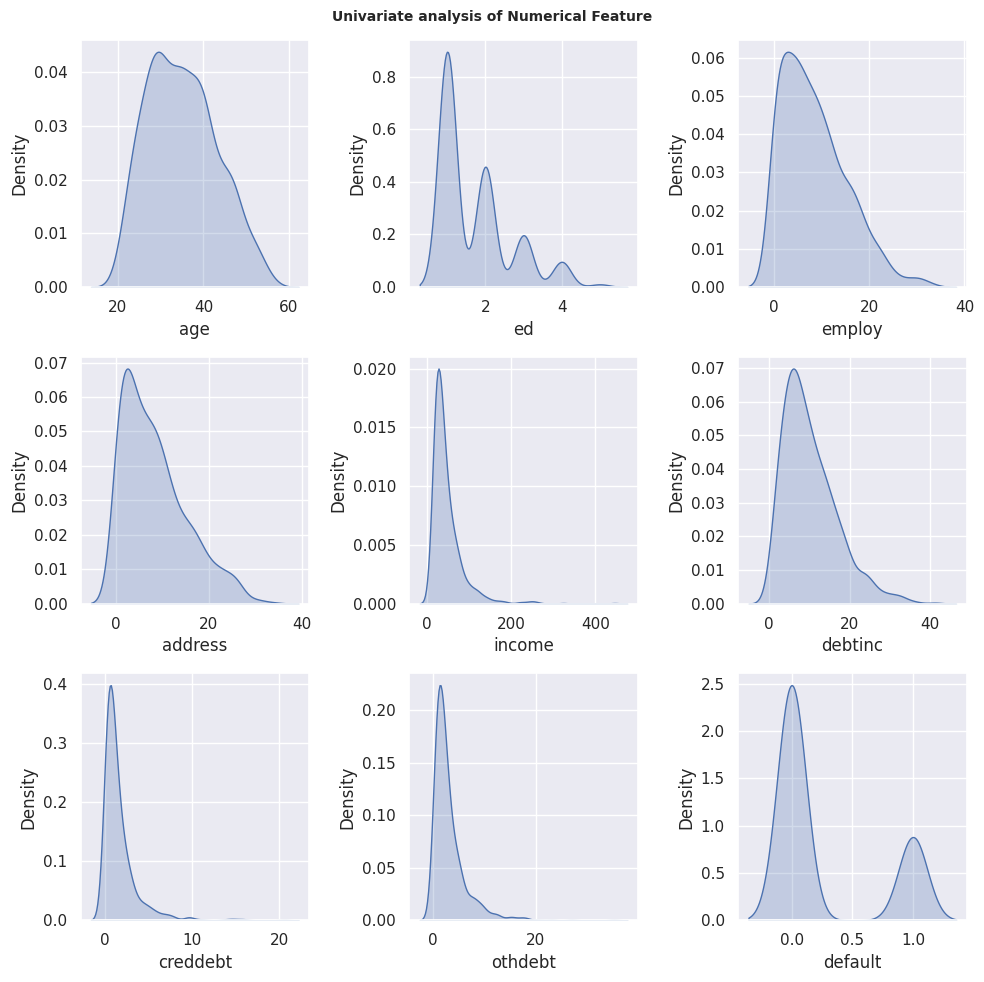

In [23]:
plt.figure(figsize=(10,10))
plt.suptitle('Univariate analysis of Numerical Feature', fontsize =10,fontweight= 'bold')

for i in range(0,len(Numerical_feature)):
    plt.subplot(3,3, i+1)
    sns.kdeplot(x=df[Numerical_feature[i]],shade=True,color='b')
    plt.xlabel(Numerical_feature[i])
    plt.tight_layout()

In [110]:
df['default'].isnull().sum()

150

In [112]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [113]:
df['default'].unique()

array([ 1.,  0., nan])

In [114]:
df['default'] = df['default'].fillna(df['default'].mode()[0])

In [115]:
df['default'].nunique()

2

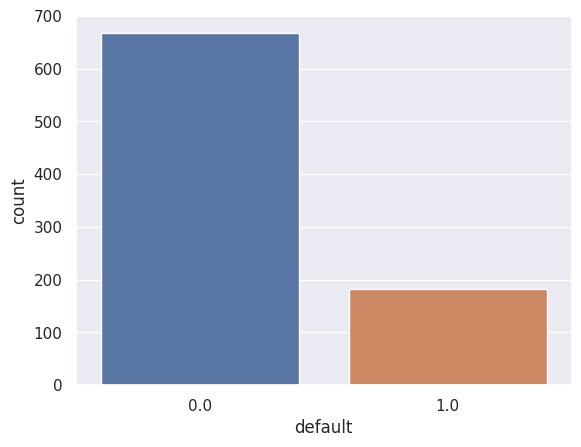

In [116]:
ax = sns.countplot(x='default',data= df)

In [117]:
df.corr()['default'].sort_values()

employ     -0.258410
address    -0.150376
age        -0.131556
income     -0.074274
ed          0.107925
othdebt     0.120898
creddebt    0.208834
debtinc     0.355378
default     1.000000
Name: default, dtype: float64

<Axes: >

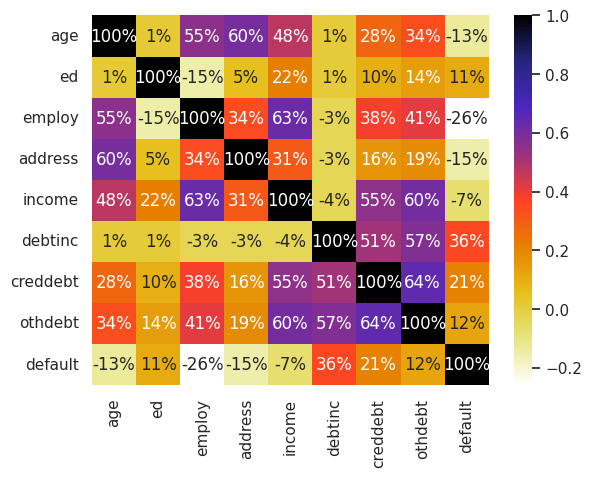

In [118]:
sns.heatmap(df.corr(),cmap ="CMRmap_r", annot=True, fmt='.0%')

In [74]:
df.describe().T

count       mean        std        min        25%        50%  \
age       850.0  35.029412   8.041432  20.000000  29.000000  34.000000   
ed        850.0   1.672941   0.834742   1.000000   1.000000   1.000000   
employ    850.0   8.534118   6.677980   0.000000   3.000000   7.000000   
address   850.0   8.326471   6.765912   0.000000   3.000000   7.000000   
income    850.0  43.086471  24.811644  13.000000  24.000000  35.000000   
debtinc   850.0  10.005529   6.237349   0.100000   5.100000   8.700000   
creddebt  850.0   1.136499   0.856678   0.011696   0.382176   0.885091   
othdebt   850.0   2.558745   1.863869   0.045584   1.045942   2.003243   
default   850.0   0.253647   0.412344   0.000000   0.000000   0.000000   

                75%    max  
age       41.000000   56.0  
ed         2.000000    3.5  
employ    13.000000   28.0  
address   12.000000   25.5  
income    55.750000  101.5  
debtinc   13.800000   25.0  
creddebt   1.898440    2.5  
othdebt    3.903001    6.0  
default    0.400000    1.0

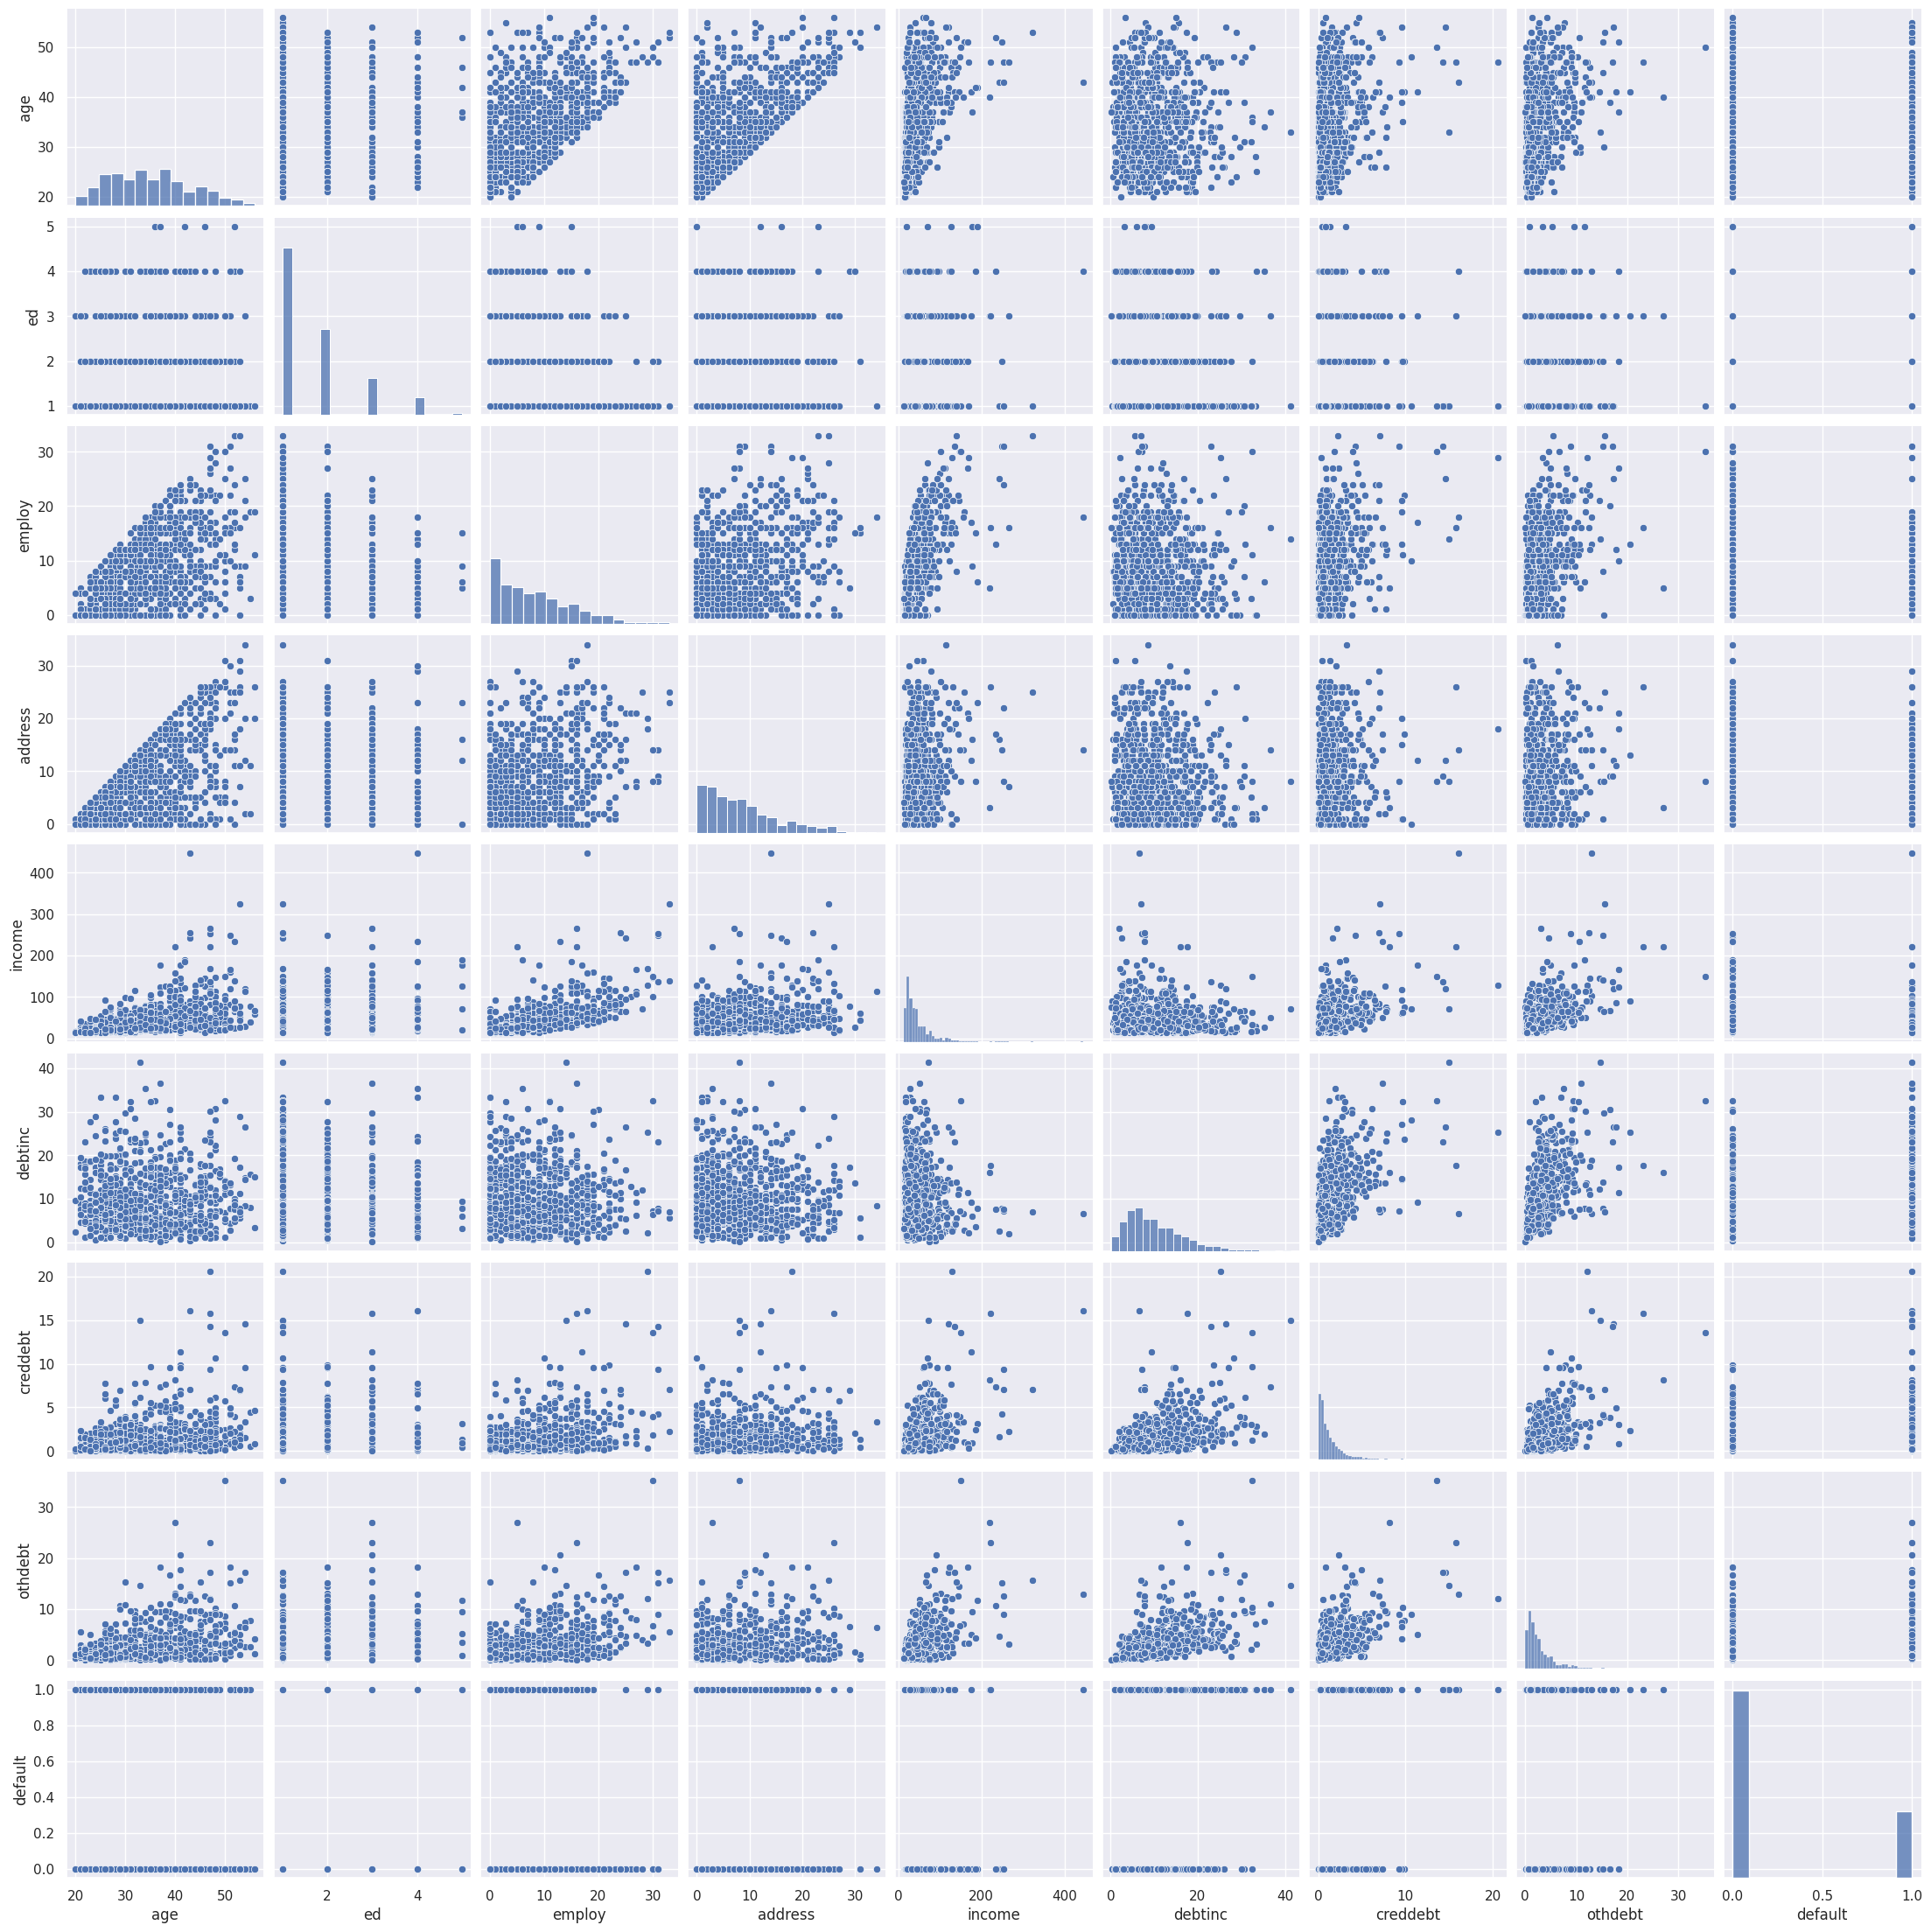

In [32]:
sns.pairplot(df)

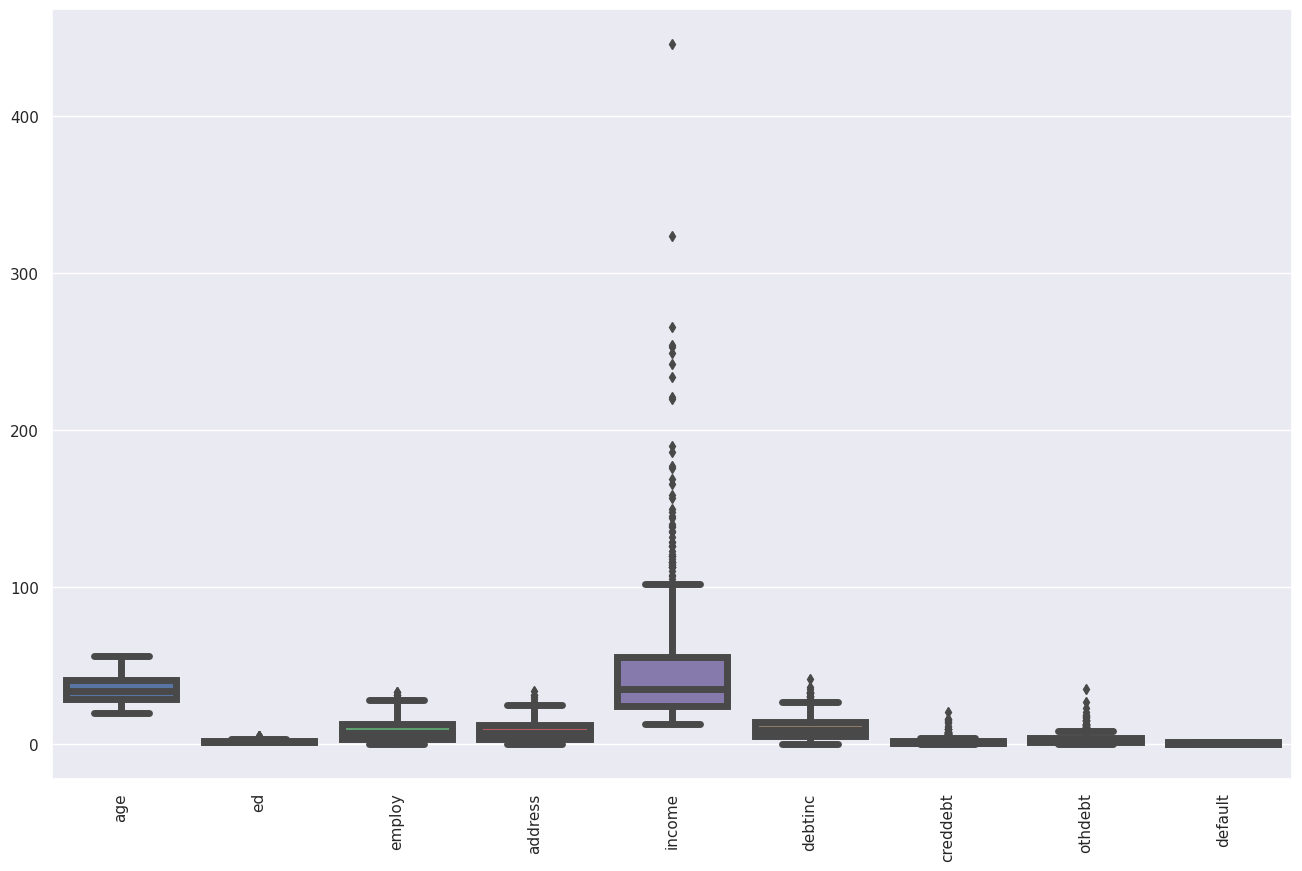

In [33]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df, linewidth=5)
plt.xticks(rotation='vertical')
plt.show()

In [37]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

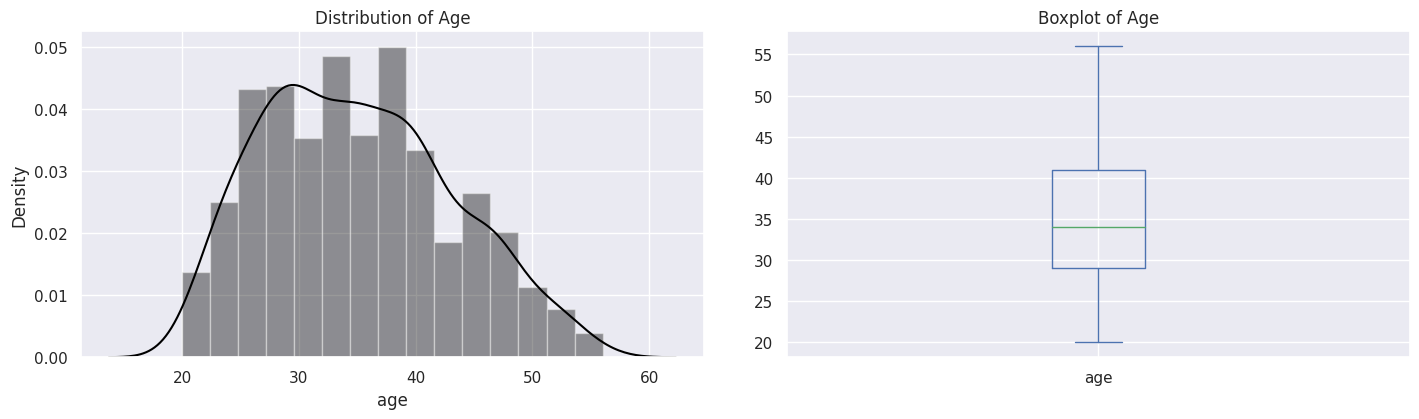

In [54]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['age'],color='black')
plt.title("Distribution of Age")
plt.subplot(122)
df['age'].plot.box(title='Boxplot of Age')
plt.tight_layout(pad=3)

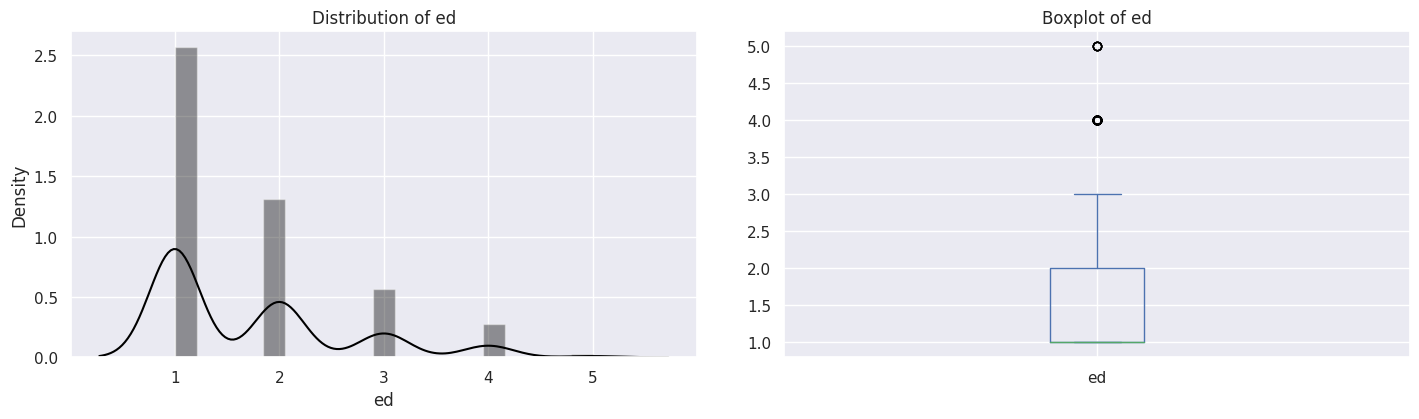

In [55]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['ed'],color='black')
plt.title("Distribution of ed")
plt.subplot(122)
df['ed'].plot.box(title='Boxplot of ed')
plt.tight_layout(pad=3)

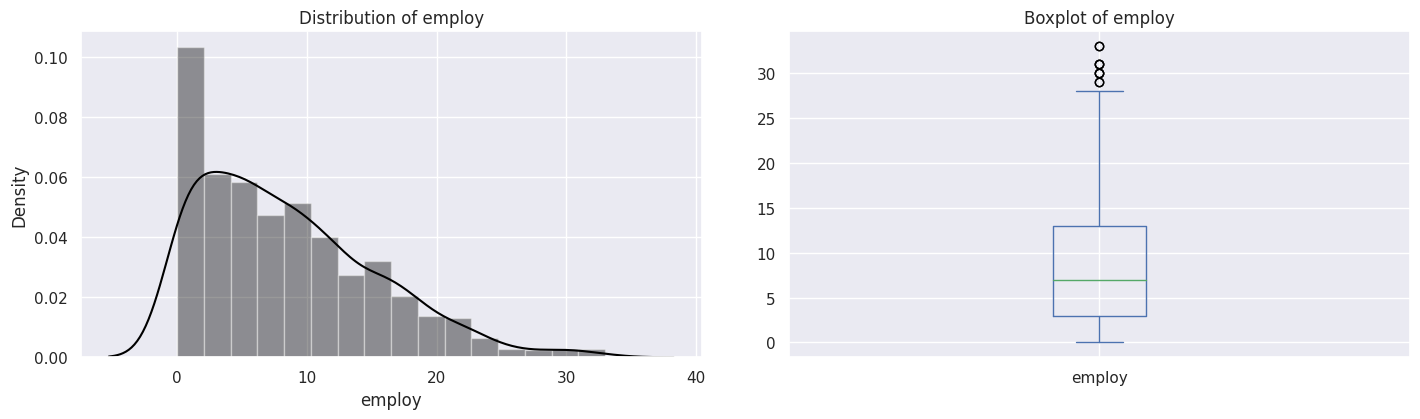

In [56]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['employ'],color='black')
plt.title("Distribution of employ")
plt.subplot(122)
df['employ'].plot.box(title='Boxplot of employ')
plt.tight_layout(pad=3)

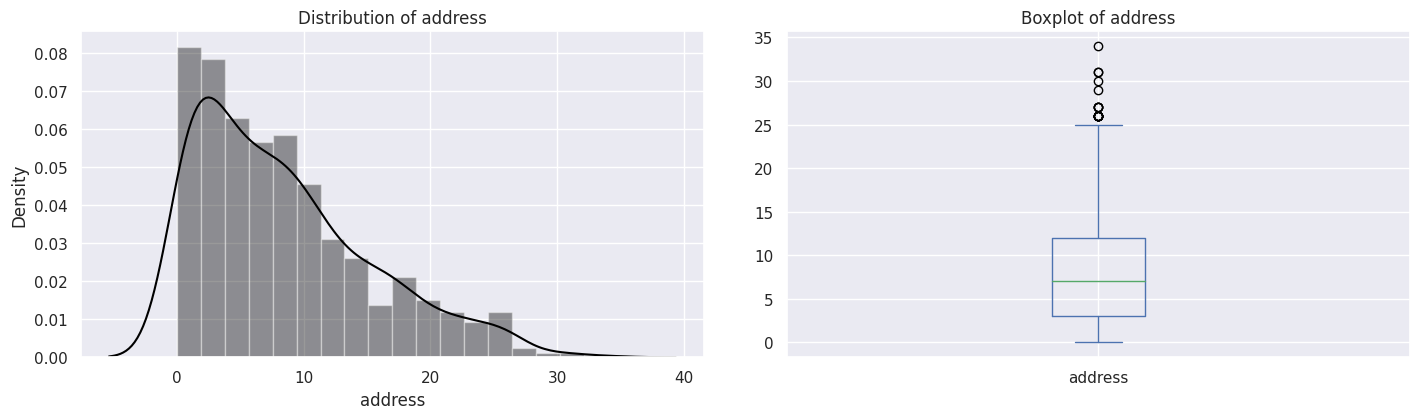

In [57]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['address'],color='black')
plt.title("Distribution of address")
plt.subplot(122)
df['address'].plot.box(title='Boxplot of address')
plt.tight_layout(pad=3)

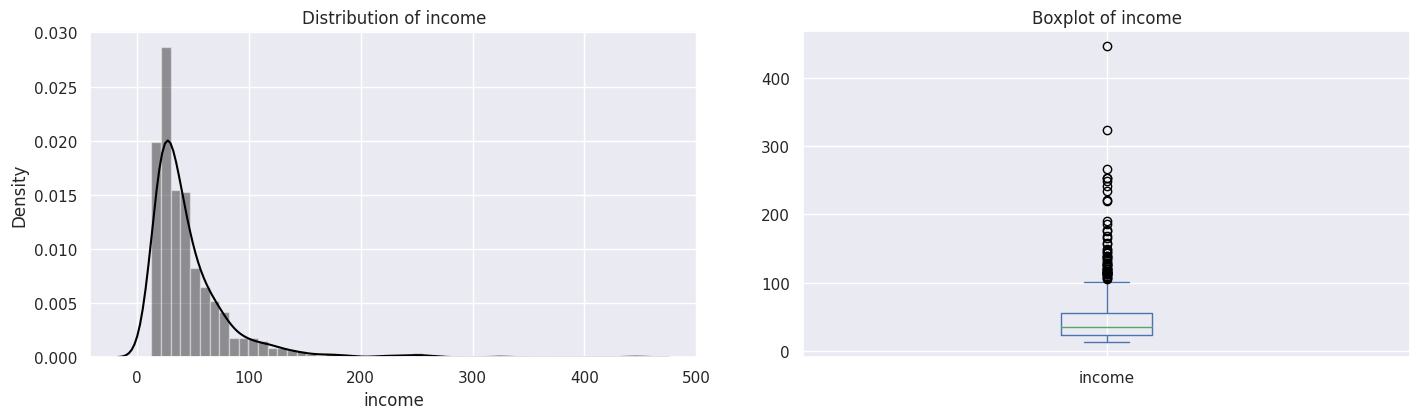

In [58]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['income'],color='black')
plt.title("Distribution of income")
plt.subplot(122)
df['income'].plot.box(title='Boxplot of income')
plt.tight_layout(pad=3)

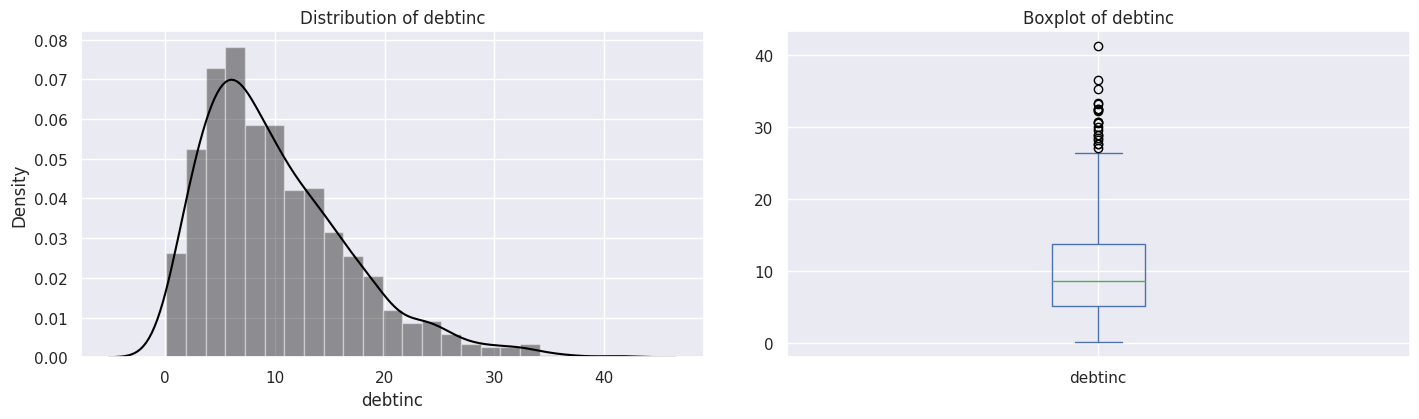

In [59]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['debtinc'],color='black')
plt.title("Distribution of debtinc")
plt.subplot(122)
df['debtinc'].plot.box(title='Boxplot of debtinc')
plt.tight_layout(pad=3)

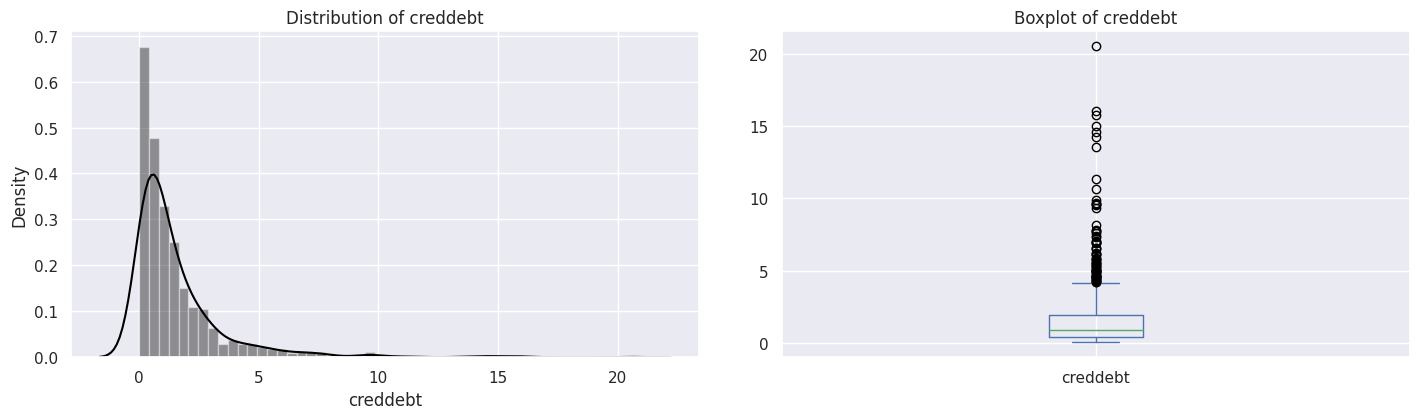

In [60]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['creddebt'],color='black')
plt.title("Distribution of creddebt")
plt.subplot(122)
df['creddebt'].plot.box(title='Boxplot of creddebt')
plt.tight_layout(pad=3)

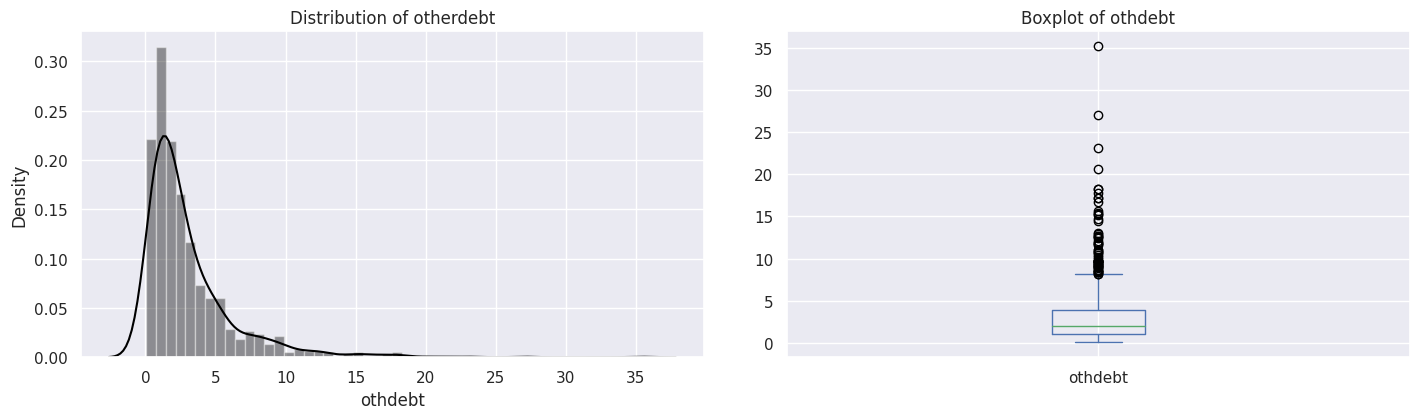

In [61]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['othdebt'],color='black')
plt.title("Distribution of otherdebt")
plt.subplot(122)
df['othdebt'].plot.box(title='Boxplot of othdebt')
plt.tight_layout(pad=3)

In [62]:
def detect_outliers(col):
  #finding IQR
  percentile75 = int(df[col].quantile(0.75))
  percentile25 = int(df[col].quantile(0.25))
  print('\n #####', col, '#####')
  print("percentile25=", percentile25)
  print("percentile75=", percentile75)
  IQR = percentile75 - percentile25
  #finding upper limit and lower Limit
  upper_limit = percentile75+1.5*IQR
  lower_limit = percentile25-1.5*IQR
  print("upper_limit:", upper_limit)
  print("lower_limit:", lower_limit)
  df.loc[(df[col]>upper_limit),col]=upper_limit
  df.loc[(df[col]<lower_limit),col]=lower_limit
  return df

In [63]:
for col in df:
  detect_outliers(col)


 ##### age #####
percentile25= 29
percentile75= 41
upper_limit: 59.0
lower_limit: 11.0

 ##### ed #####
percentile25= 1
percentile75= 2
upper_limit: 3.5
lower_limit: -0.5

 ##### employ #####
percentile25= 3
percentile75= 13
upper_limit: 28.0
lower_limit: -12.0

 ##### address #####
percentile25= 3
percentile75= 12
upper_limit: 25.5
lower_limit: -10.5

 ##### income #####
percentile25= 24
percentile75= 55
upper_limit: 101.5
lower_limit: -22.5

 ##### debtinc #####
percentile25= 5
percentile75= 13
upper_limit: 25.0
lower_limit: -7.0

 ##### creddebt #####
percentile25= 0
percentile75= 1
upper_limit: 2.5
lower_limit: -1.5

 ##### othdebt #####
percentile25= 1
percentile75= 3
upper_limit: 6.0
lower_limit: -2.0

 ##### default #####
percentile25= 0
percentile75= 1
upper_limit: 2.5
lower_limit: -1.5


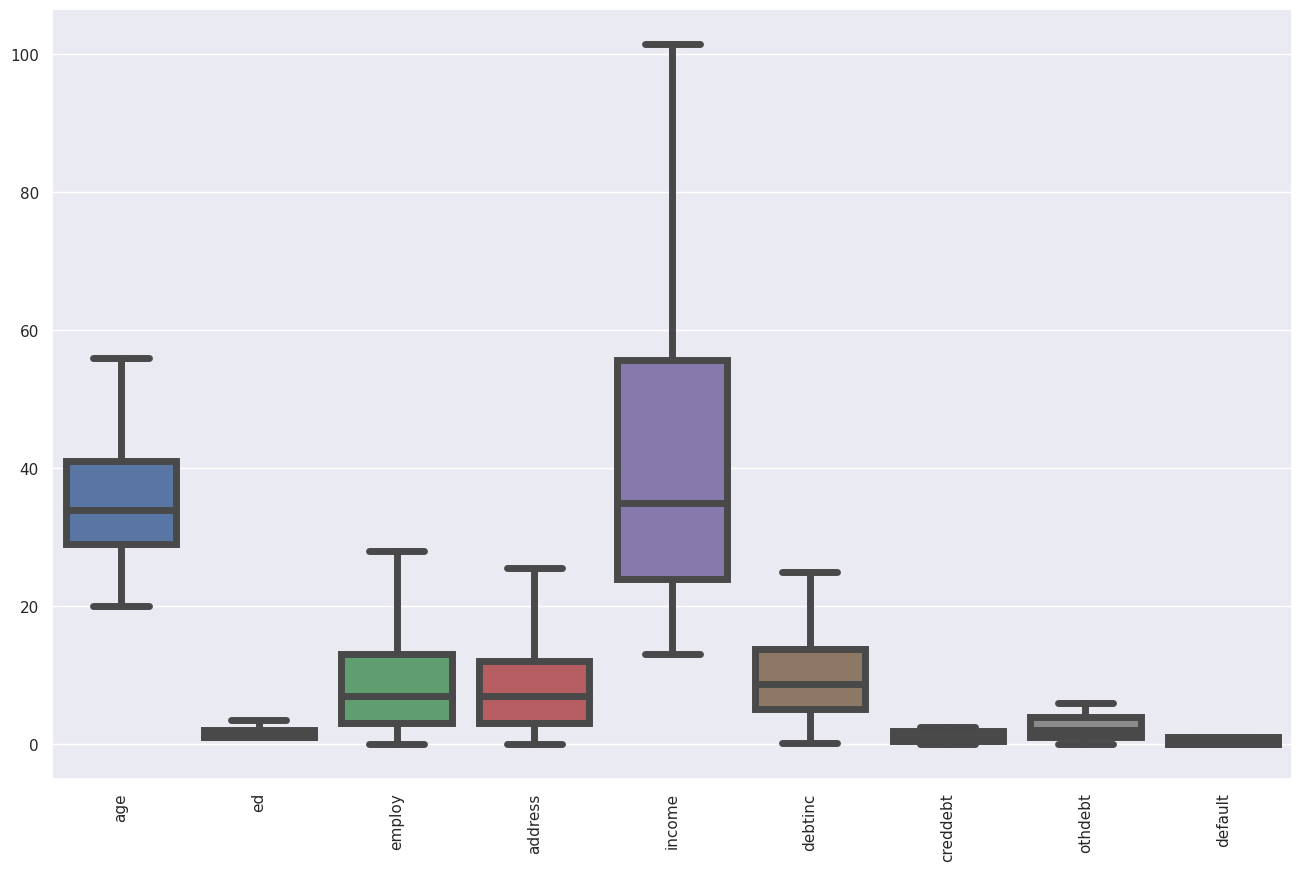

In [68]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df, linewidth=5)
plt.xticks(rotation='vertical')
plt.show()

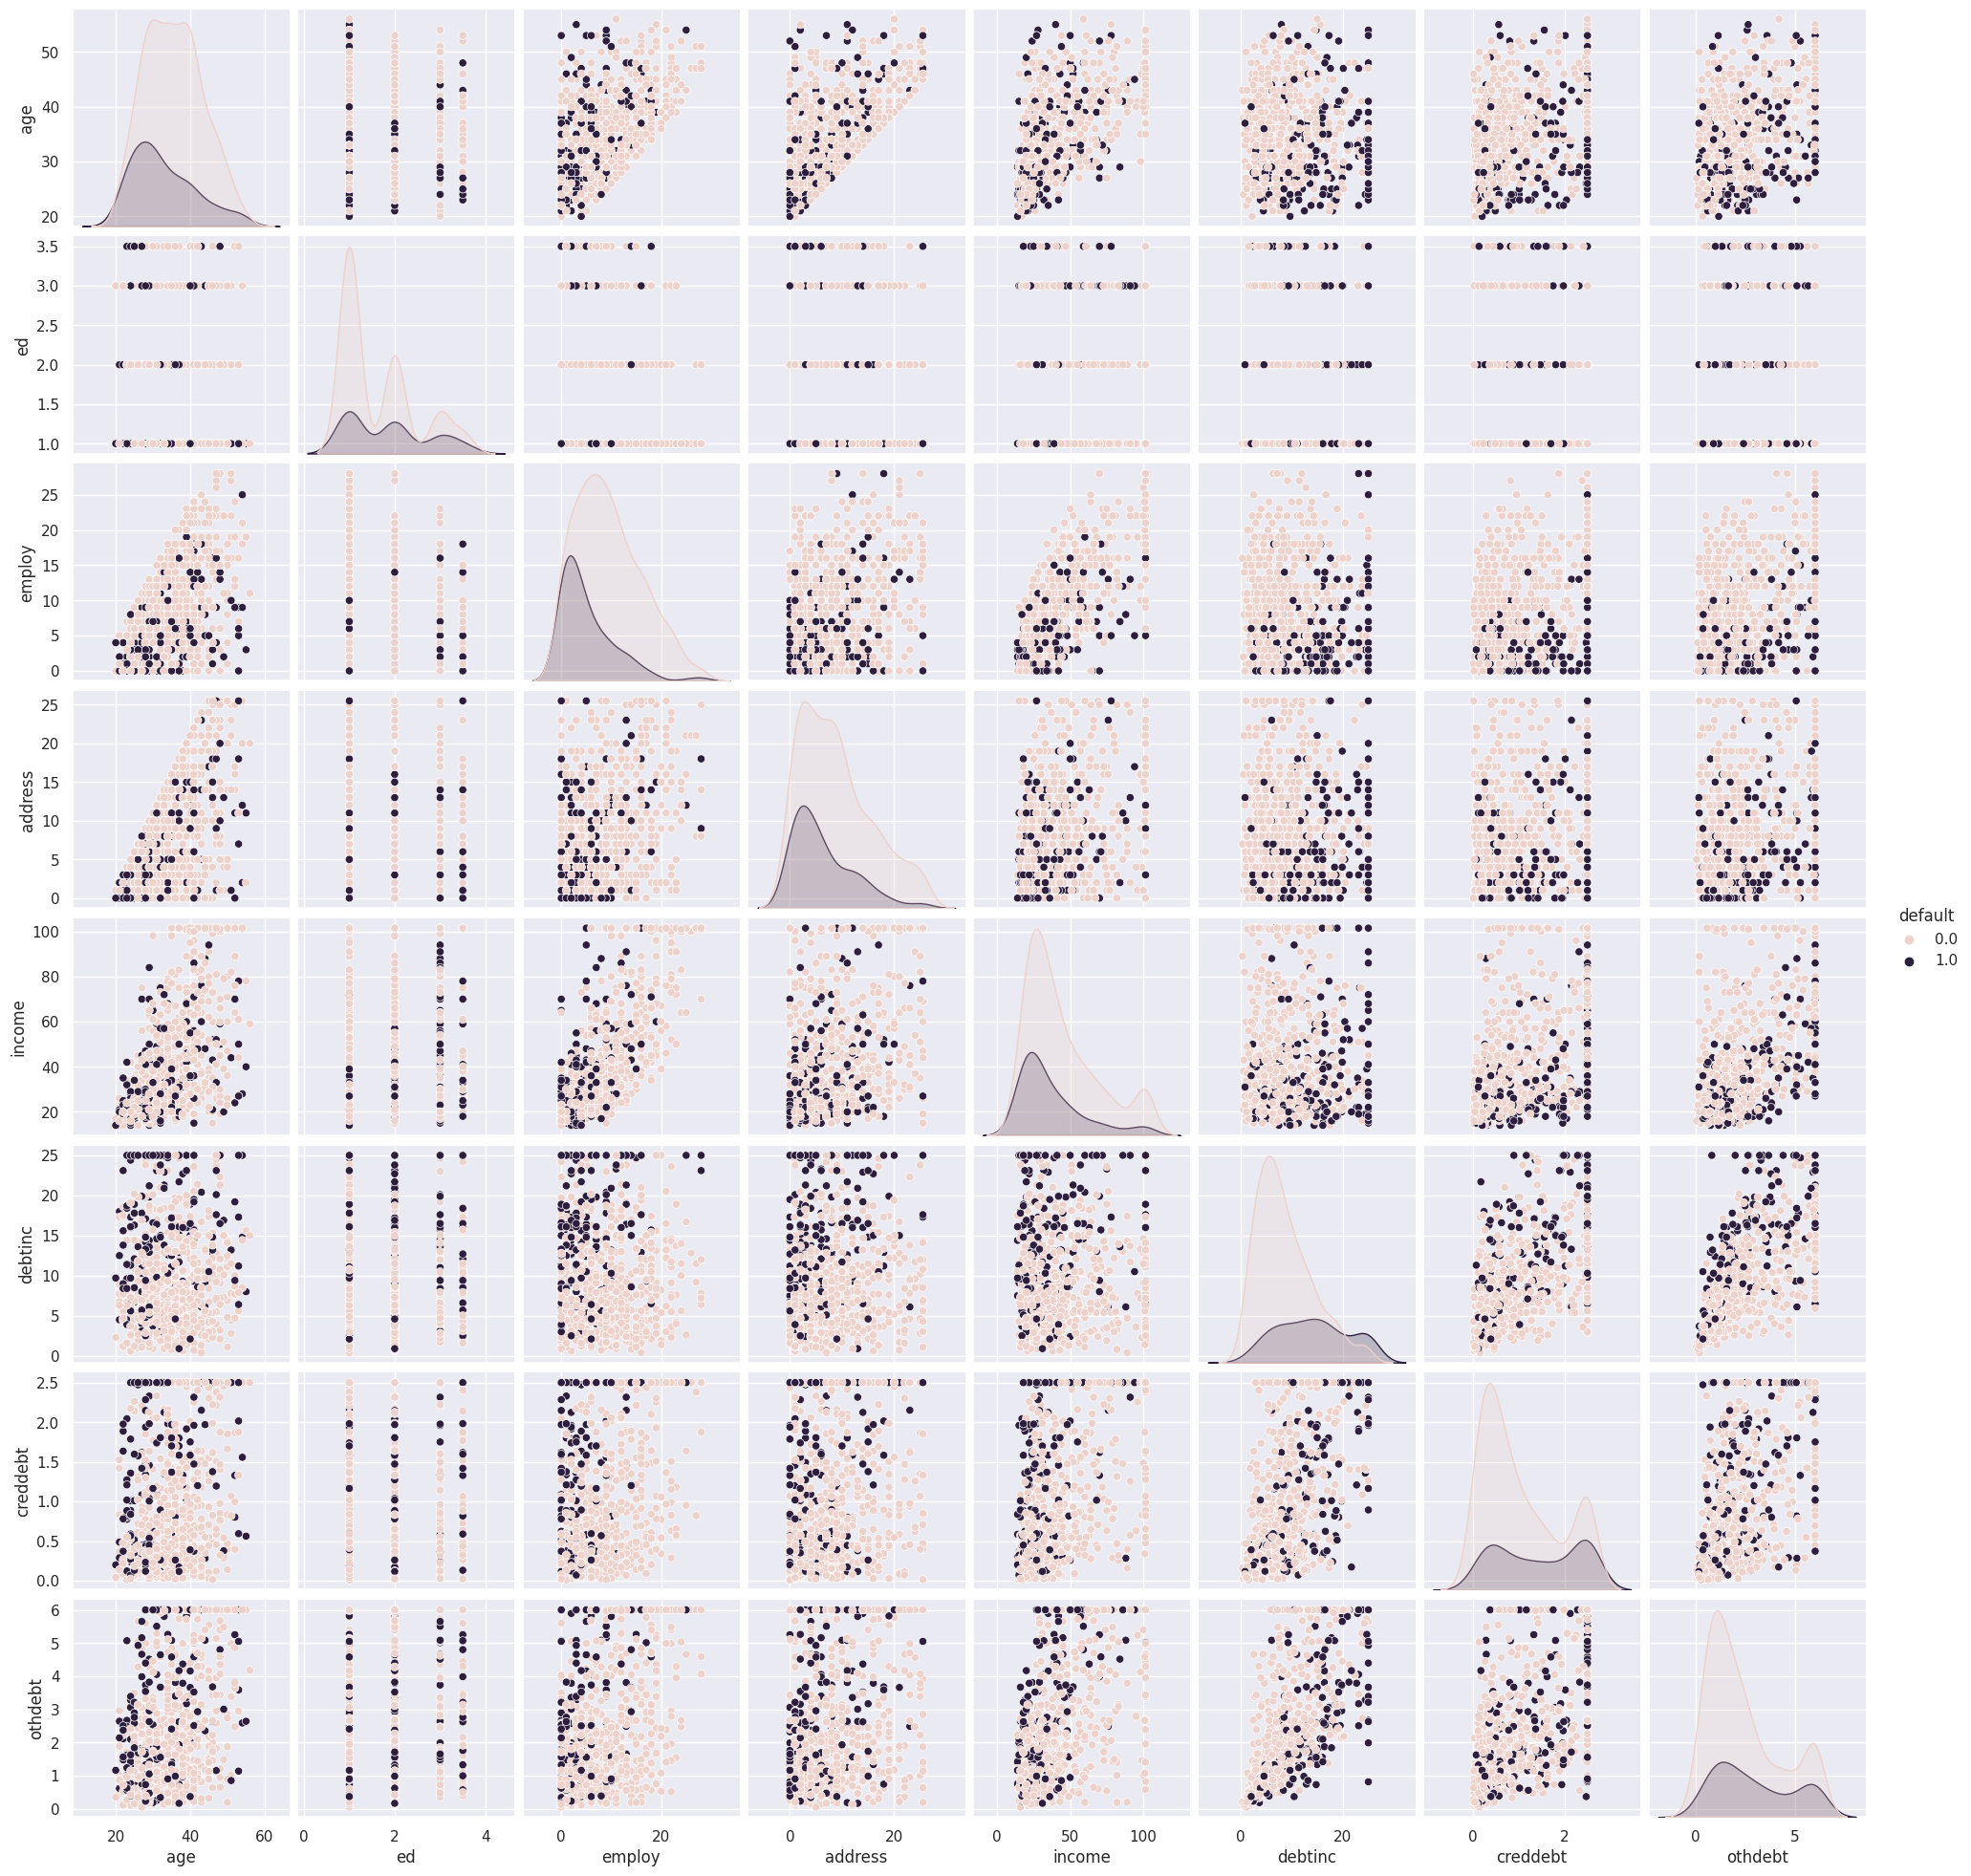

In [64]:
sns.pairplot(data=df,hue='default');

In [119]:
X=df.drop("default",axis=1)
Y=df['default']

In [120]:
VIF = []
from statsmodels.stats.outliers_influence import variance_inflation_factor
for j in range(X.shape[1]):
    VIF.append(variance_inflation_factor(X.values,j))
print(VIF)

import numpy as np
np.transpose(VIF)
pd.DataFrame(X.columns)
pd.DataFrame(np.transpose(VIF))
pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(VIF))], axis =1)

[16.268190391049043, 4.821824080293854, 5.821769822564576, 3.5356408826701653, 9.497594026182256, 8.23533652197382, 3.6800201324539277, 5.932400873426044]


0          0
0       age  16.268190
1        ed   4.821824
2    employ   5.821770
3   address   3.535641
4    income   9.497594
5   debtinc   8.235337
6  creddebt   3.680020
7   othdebt   5.932401

In [122]:
#Select K best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Select_KBest_rank_features=SelectKBest(score_func=chi2,k=8)
KBest_features=Select_KBest_rank_features.fit(X,Y)

df_Kscores=pd.DataFrame(KBest_features.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

kbest_features_rank=pd.concat([dfcolumns,df_Kscores],axis=1)

kbest_features_rank.columns=['Features','K_score']
kbest_features_rank

print(kbest_features_rank.nlargest(8,'K_score'))

   Features     K_score
5   debtinc  475.951405
2    employ  304.048614
4    income  149.069582
3   address  109.023762
6  creddebt  106.119409
7   othdebt   46.560331
0       age   27.124481
1        ed    4.976200


[0.1167364  0.06095883 0.15132298 0.11628619 0.10622307 0.18306465
 0.14428011 0.12112776]


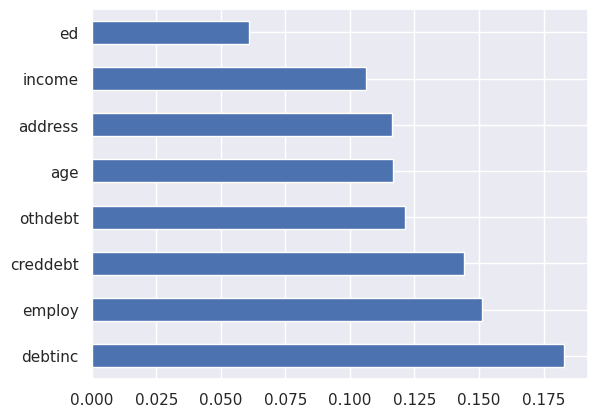

Features     Score
5   debtinc  0.183065
2    employ  0.151323
6  creddebt  0.144280
7   othdebt  0.121128
0       age  0.116736
3   address  0.116286
4    income  0.106223
1        ed  0.060959

In [123]:
#ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier
ET_model=ExtraTreesClassifier()
ET_model.fit(X,Y)

print(ET_model.feature_importances_)

import matplotlib.pyplot as plt
ET_ranked_features=pd.Series(ET_model.feature_importances_,index=X.columns)
ET_ranked_features.nlargest(10).plot(kind='barh')
plt.show()


df_ET_rank =pd.DataFrame(ET_model.feature_importances_)

dfcolumns=pd.DataFrame(X.columns)

ET_features_rank=pd.concat([dfcolumns,df_ET_rank],axis=1)
ET_features_rank.columns=['Features','Score']
ET_features_rank
ET_features_rank.nlargest(10,'Score')

debtinc     0.075585
creddebt    0.061199
age         0.044383
employ      0.021941
income      0.013838
othdebt     0.006379
dtype: float64


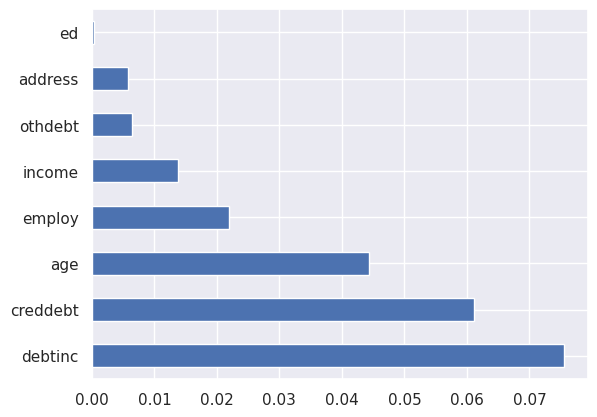

In [124]:
#Mutual Info Classifier

from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,Y)

mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

print(mutual_data.nlargest(6))

mutual_data.nlargest(13).plot(kind='barh')
plt.show()

In [127]:
threshold=0.4

# find and remove correlated features
def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [128]:
correlation(df.iloc[:,:-2],threshold)

{'address', 'creddebt', 'employ', 'income'}

In [131]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.5 MB/s eta 0:00:00


In [132]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [133]:
 rf_all_features = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 rf_all_features.fit(X,Y)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [134]:
 rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=12)
 boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
 boruta_selector.fit(np.array(X), np.array(Y))  

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	2
Iteration: 	17 / 

BorutaPy(estimator=RandomForestClassifier(max_depth=12, n_estimators=28,
                                          random_state=RandomState(MT19937) at 0x7F086DDBF740),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F086DDBF740, verbose=2)

In [136]:
print("Ranking: ",boruta_selector.ranking_)       
print("No. of significant features: ", boruta_selector.n_features_)

Ranking:  [2 5 1 4 3 1 1 1]
No. of significant features:  4
